'' Bài tập 1: Sử dụng dữ liệu dulieuxettuyendaihoc.csv.
Hãy gom cụm điểm trung bình toán của cả 2 học kì năm lớp 12 (gọi là TBT12) và điểm LOGIC với số cụm tốt nhất
Thiết lập random_state là 17. Hãy trả lời các câu hỏi bên dưới:  
1. Số cụm là bao nhiêu là tốt nhất
2. Giá trị các vector thể hiện cho các center của cụm
3. Giá trị Lowest SSE đánh giá mô hình
4. In ra bảng dữ liệu và kết quả gom cụm
5. Hãy cho biết tổng khoảng cách trung bình của 5 phần tử đầu tiên thuộc cụm có nhãn là 1 đến tâm của cụm
6. Trực quan tổng hợp thống kê cho kết quả gom cụm
7. Trực quan kết quả gom cụm
8. Hãy cho biết một sinh viên có TBT12 là 6.78 và điểm thi LOGIC là 5.76 thì sẽ thuộc cụm nào
'''

''' Bài tập 2: Hãy làm lại các yêu cầu như trên nhưng dùng độ đo (metric) là Manhattan để đo lường sự giống nhau của
hai phần tử


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import  KneeLocator
from sklearn.metrics import silhouette_score




In [35]:
df=pd.read_csv('dulieuxettuyendaihoc.csv')

In [36]:
df=df[['T5','T6','GT','DT','KV','KT','NGONNGU','TOANLOGICPHANTICH', 'GIAIQUYETVANDE','NGAYTHI','DINHHUONGNGHENGHIEP']]

In [37]:
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'},inplace=True)

In [38]:
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP
0,7.4,6.9,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,5.5,5.7,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No
97,9.0,8.5,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,4.1,4.3,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No


In [39]:
df['TBT12']=(df['T5']+df['T6'])/2

In [40]:
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP,TBT12
0,7.4,6.9,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15
1,3.0,4.0,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50
2,4.8,5.7,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No,5.25
3,6.1,7.4,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75
4,6.8,8.0,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25
96,5.5,5.7,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No,5.60
97,9.0,8.5,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75
98,4.1,4.3,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No,4.20


In [41]:
data=df[['TBT12','LOGIC']]

In [42]:
data

,TBT12,LOGIC
0,7.15,3.25
1,3.50,4.00
2,5.25,6.75
3,6.75,4.25
4,7.40,4.50
...,...,...
95,7.25,1.50
96,5.60,3.75
97,8.75,8.00
98,4.20,3.50


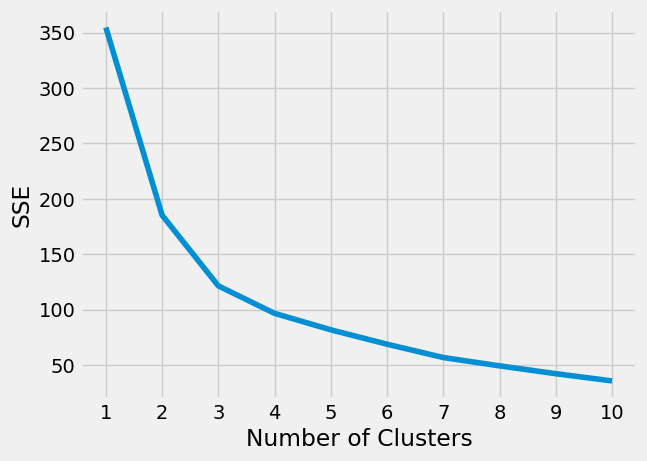

In [56]:
#1. Số cụm là bao nhiêu là tốt nhất
kmeans = KMeans(n_clusters=4).fit(data)
#Chọn số cụm tốt nhất
kmeans_kwargs = {"init": "random","n_init":10,"max_iter":300,"random_state":17}
sse =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [58]:
#Cách 2 Dùng phương phát độ đo ElBoww để tìm số cụm là tốt nhất
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
print(k1.elbow)

3


In [66]:
#cau 1: số cụm tốt nhất là 3

In [73]:
#cau2
Kmeans=KMeans(n_clusters=3,random_state=17).fit(data)
print(Kmeans.cluster_centers_)

[[5.06607143e+00 4.08928571e+00 4.44089210e-16]
 [7.88030303e+00 5.10606061e+00 1.00000000e+00]
 [7.20000000e+00 3.65384615e+00 2.00000000e+00]]


In [48]:
print(kmeans.inertia_)

121.3474614968365


In [49]:
#cau4 in ra bảng dữ liệu và kết quả gom cụm
# Gán nhãn cho từng điểm dữ liệu
labels = kmeans.labels_[:]

# 4. In ra bảng dữ liệu và kết quả gom cụm
data['Cluster'] = labels
print(data[['TBT12', 'LOGIC', 'Cluster']])

    TBT12  LOGIC  Cluster
0    7.15   3.25        2
1    3.50   4.00        0
2    5.25   6.75        0
3    6.75   4.25        2
4    7.40   4.50        1
..    ...    ...      ...
95   7.25   1.50        2
96   5.60   3.75        0
97   8.75   8.00        1
98   4.20   3.50        0
99   5.35   2.50        0

[100 rows x 3 columns]


C:\Users\THANH DUOC\AppData\Local\Temp\ipykernel_16740\1099964050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


In [54]:
# Lấy tâm của các cụm
centers = kmeans.cluster_centers_

# Lấy các phần tử thuộc cụm có nhãn là 1
cluster_1_indices = np.where(data['Cluster'] == 1)[0]
first_5_elements_indices = cluster_1_indices[:5]

# Tính tổng khoảng cách từ các phần tử đầu tiên đến tâm của cụm
distances = np.linalg.norm(X[first_5_elements_indices] - centers[1], axis=1)
average_distance = np.mean(distances)

# In ra tổng khoảng cách trung bình
print("Tổng khoảng cách trung bình của 5 phần tử đầu tiên thuộc cụm có nhãn là 1 đến tâm của cụm:", average_distance)


ValueError: operands could not be broadcast together with shapes (5,3) (2,) 